# predicting house price

In [2]:
import graphlab

In [3]:
md =graphlab.SFrame("home_data.gl")

/opt/conda/lib/python2.7/site-packages/requests/packages/urllib3/connection.py:266: SubjectAltNameWarning: Certificate for beta.graphlab.com has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SubjectAltNameWarning
2016-07-07 23:41:26,301 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: /tmp/graphlab_server_1467934885.log


This non-commercial license of GraphLab Create is assigned to mlmbt@yahoo.com and will expire on June 30, 2017. For commercial licensing options, visit https://turi.com/buy/.


In [4]:
md

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [5]:
graphlab.canvas.set_target("ipynb")
md.show(view="Scatter Plot", x= "sqft_living", y= "price")




# create simple linear regresion model


In [6]:
training, test= md.random_split(0.8, seed=0)

training

In [24]:
graphlab.canvas.set_target('ipynb')
training.show(view= "Scatter Plot", x= "sqft_living", y= "price")
             

In [25]:
graphlab.canvas.set_target("ipynb")
test.show(view= "Scatter Plot", x="sqft_living", y ="price")


In [26]:
import matplotlib.pyplot as pt
%matplotlib inline

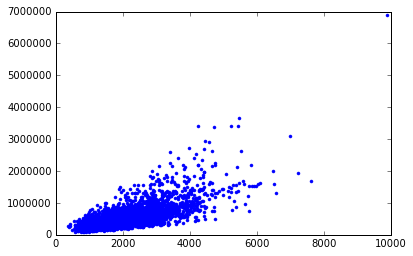

In [10]:
pt.plot(test["sqft_living"], test["price"], ".", )

In [11]:
test

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0114101516,2014-05-28 00:00:00+00:00,310000,3,1,1430,19901,1.5,0
9297300055,2015-01-24 00:00:00+00:00,650000,4,3,2950,5000,2,0
1202000200,2014-11-03 00:00:00+00:00,233000,3,2,1710,4697,1.5,0
8562750320,2014-11-10 00:00:00+00:00,580500,3,2.5,2320,3980,2,0
7589200193,2014-11-10 00:00:00+00:00,535000,3,1,1090,3000,1.5,0
2078500320,2014-06-20 00:00:00+00:00,605000,4,2.5,2620,7553,2,0
7766200013,2014-08-11 00:00:00+00:00,775000,4,2.25,4220,24186,1,0
9478500640,2014-08-19 00:00:00+00:00,292500,4,2.5,2250,4495,2,0
9558200045,2014-08-28 00:00:00+00:00,289000,3,1.75,1260,8400,1,0
8820901275,2014-06-10 00:00:00+00:00,571000,4,2,2750,7807,1.5,0


In [12]:
pmodel= graphlab.linear_regression.create(training, target="price", features=["sqft_living"])


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16485

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.010404     | 4297314.629387     | 4372663.317328       | 260882.261732 | 298375.840708   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [13]:
pmodel.evaluate(test)


{'max_error': 4161766.219839277, 'rmse': 255154.39026056457}

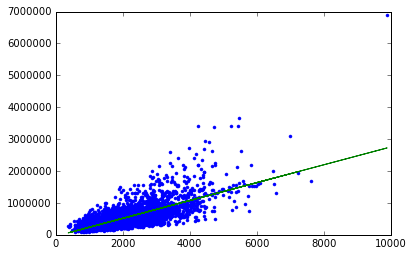

In [14]:
import matplotlib.pyplot as pt
%matplotlib inline
pt.plot(test["sqft_living"], test["price"] , ".", test["sqft_living"], pmodel.predict(test), "-")
    

In [15]:
 comp= [test["price"],pmodel.predict(test)]

In [16]:
comp


[dtype: int
 Rows: 4229
 [310000, 650000, 233000, 580500, 535000, 605000, 775000, 292500, 289000, 571000, 349000, 360000, 243500, 247500, 470000, 480000, 770000, 519950, 527700, 420000, 890000, 282950, 255000, 420000, 807100, 284000, 917500, 425000, 260000, 297000, 274250, 840000, 677900, 280000, 279950, 479950, 264950, 1025000, 2400000, 260000, 525000, 369900, 210000, 304900, 170000, 2050000, 780000, 330000, 360000, 550000, 208633, 315000, 1384000, 1400000, 548000, 520000, 230000, 232000, 740000, 640000, 940000, 559900, 265000, 425000, 552250, 206600, 299000, 855000, 437500, 420000, 795000, 810000, 338000, 315000, 450000, 799000, 403950, 490000, 330000, 927000, 530000, 352000, 322500, 650000, 339000, 570000, 423000, 482000, 1300000, 988000, 1000000, 350000, 205000, 333500, 255000, 348000, 325000, 340500, 290900, 315000, ... ],
 dtype: float
 Rows: 4229
 [357164.07865654863, 782273.5285721922, 435473.71416732506, 606076.8486729452, 262073.8069648915, 689980.0295773485, 1137463.66106749

In [17]:
pmodel.get("coefficients")


name,index,value,stderr
(intercept),None,-42774.4169878,5033.47367593
sqft_living,None,279.677269681,2.21423519694


In [18]:
pmodel.get("coefficients")
                



name,index,value,stderr
(intercept),None,-42774.4169878,5033.47367593
sqft_living,None,279.677269681,2.21423519694


In [19]:
test["price"]

dtype: int
Rows: 4229
[310000, 650000, 233000, 580500, 535000, 605000, 775000, 292500, 289000, 571000, 349000, 360000, 243500, 247500, 470000, 480000, 770000, 519950, 527700, 420000, 890000, 282950, 255000, 420000, 807100, 284000, 917500, 425000, 260000, 297000, 274250, 840000, 677900, 280000, 279950, 479950, 264950, 1025000, 2400000, 260000, 525000, 369900, 210000, 304900, 170000, 2050000, 780000, 330000, 360000, 550000, 208633, 315000, 1384000, 1400000, 548000, 520000, 230000, 232000, 740000, 640000, 940000, 559900, 265000, 425000, 552250, 206600, 299000, 855000, 437500, 420000, 795000, 810000, 338000, 315000, 450000, 799000, 403950, 490000, 330000, 927000, 530000, 352000, 322500, 650000, 339000, 570000, 423000, 482000, 1300000, 988000, 1000000, 350000, 205000, 333500, 255000, 348000, 325000, 340500, 290900, 315000, ... ]

In [20]:
test["price"][2]

233000

In [21]:
test[2]

{'bathrooms': '2',
 'bedrooms': '3',
 'condition': 5,
 'date': datetime.datetime(2014, 11, 3, 0, 0, tzinfo=GMT +0.0),
 'floors': '1.5',
 'grade': 6,
 'id': '1202000200',
 'lat': 47.30482931,
 'long': -122.21774909,
 'price': 233000,
 'sqft_above': 1710,
 'sqft_basement': 0,
 'sqft_living': 1710,
 'sqft_living15': 1030.0,
 'sqft_lot': 4697,
 'sqft_lot15': 4705.0,
 'view': 0,
 'waterfront': 0,
 'yr_built': 1941,
 'yr_renovated': 0,
 'zipcode': '98002'}

In [22]:
test[[3]]

TypeError: Invalid key type: must be str, bytes or type

In [ ]:
pmodel.get('coefficients')["value"]

In [ ]:
help(trans)

    

# Exploring  more featurs 



In [ ]:
myfeature= ["bedrooms", "bathrooms", "sqft_living","sqft_lot", "floors", "zipcode"]


In [ ]:
md[myfeature].show()

In [ ]:
old_price=graphlab.SFrame(md["price"])

In [ ]:
old_price

In [27]:
md.show(view="BoxWhisker Plot", x="zipcode", y="price")

In [ ]:
md.show(view="BoxWhisker Plot", x="yr_built", y= "price")

md.plot( "sqft_living", "price", ".")

# Build regression model with more features 


In [ ]:
feature_model= graphlab.linear_regression.create(training, target="price", features= myfeature)

In [ ]:
feature_model.get("coefficients")

In [ ]:
print pmodel.evaluate(test)
print feature_model.evaluate(test)

# apply leaned model to predict three house 


In [1]:
h1= md[md['id']=="5309101200"]
h1


NameError: name 'md' is not defined

<img src="house-5309101200.jpg">

In [ ]:
print h1["price"]

In [ ]:
print pmodel.predict(h1)
print feature_model.predict(h1)

In [ ]:
print pmodel.evaluate(h1)
print feature_model.evaluate(h1)

# prediction for the second house

In [ ]:
h2= md[md["id"]=="1925069082"]

In [ ]:
h2


In [ ]:
 print h2["price"]

In [ ]:
print feature_model.predict(h2)

In [ ]:
print pmodel.predict(h2)

In [ ]:
h3= {'bedrooms':[8],'bathrooms':[25],"sqft_living":[50000], 'sqft_lot': [225000], 'floors': [4], 'zipcode':['98039']}

In [ ]:
print h3

In [ ]:
dh3= graphlab.SFrame(h3)

In [ ]:
dh3

In [ ]:
print feature_model.predict(dh3)

# Coding assignment : 
Identifieng the zipcode having the highest sales price and comput the average in the area 

In [ ]:
graphlab.canvas.set_target("ipynb")
md.show(view="BoxWhisker Plot", x="zipcode", y= "price")
    

In [ ]:
import matplotlib as mp

In [2]:
mp.plot(scatter plotmd['price'], md['zipcode'])

SyntaxError: invalid syntax (<ipython-input-2-128fb1922282>, line 1)